In [3]:
import numpy as np
from netCDF4 import Dataset
import itertools
import matplotlib.pyplot as plt
from matplotlib import gridspec
import warnings
warnings.filterwarnings("ignore")

In [4]:
datapath = '/Users/carmennab/Dropbox/met_office/data/experiments/FOAM_grid/'
ctrl = np.array(Dataset(datapath+'rosie_UCL_CTL_NOSIT_ASSIM_r243541_dcarneir.nc')['sivolu'])
base = np.array(Dataset(datapath+'rosie_UCL_BASELINE_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_r243541_dcarneir.nc')['sivolu'])
nine = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA09_r243541_dcarneir.nc')['sivolu'])
six = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA06_r243541_dcarneir.nc')['sivolu'])
larm = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_BRISTOL_SNFOAM_ALPHA1_r243541_dcarneir.nc')['sivolu'])

cpom = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_CPOM_SNFOAM_ALPHA1_r243541_dcarneir.nc')['sivolu'])
smlg = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNLG_ALPHA1_r243541_dcarneir.nc')['sivolu'])
awi = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNAWI_ALPHA1_r243541_dcarneir.nc')['sivolu'])
unc = np.array(Dataset(datapath+'rosie_UCL_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_NEW_OBERR_r243541_dcarneir.nc')['sivolu'])

names = ['CTRL','BASE','\u03B1_0.9', '\u03B1_0.6','FB_LARM','FB_CPOM','SN_SMLG','SN_AWI','UNC']
sits = [ctrl, base, nine, six, larm, cpom, smlg, awi, unc]
colors = ['blue','red','#e7298a','green','purple','#ff7f00','brown','black', 'c']
xs = [0.08,0.13,0.18,0.23,0.28,0.33,0.38,0.43,0.48,0.53,0.58]
buoy_xs = [1106,1126,1114]
buoy_ys = [476,459,502]

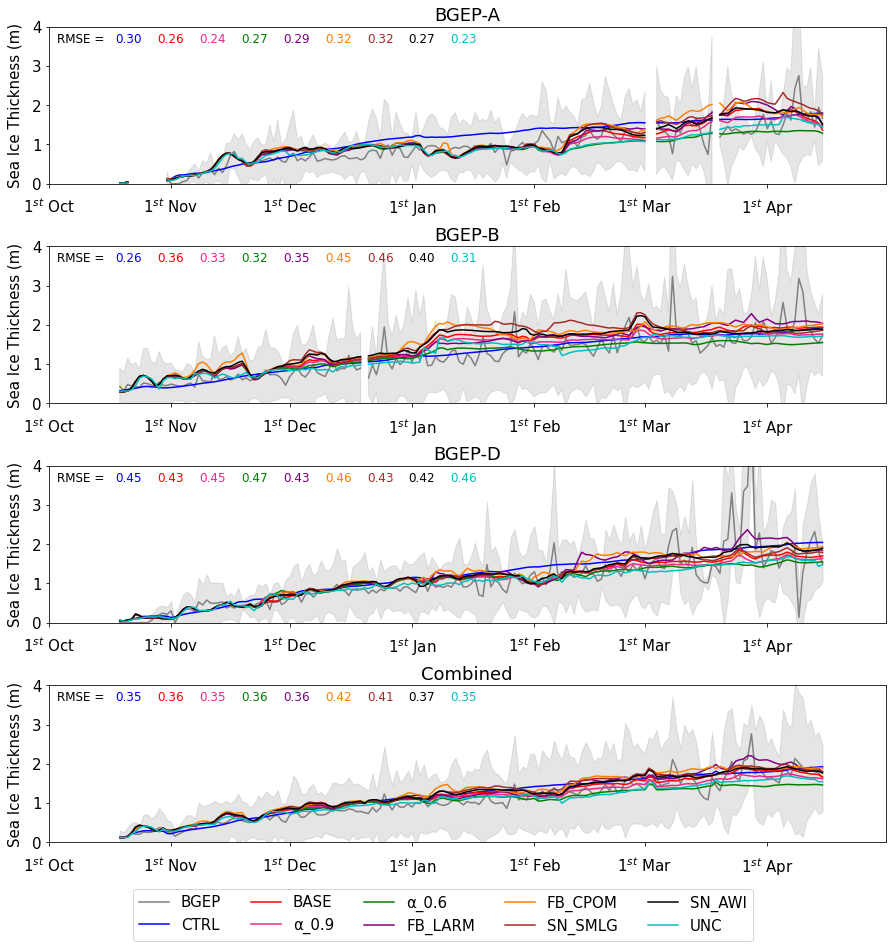

In [10]:
buoys = ['a','b','d']
buoy_names = ['BGEP-A','BGEP-B','BGEP-D']

fig = plt.figure(figsize=(15,15))
plt.rc('font', size=15)
spec = gridspec.GridSpec(ncols=1, nrows=4, wspace=0.25, hspace=0.4)
days = np.arange(0,212)

bgep_path = '/Users/carmennab/Dropbox/met_office/data/validation/BGEP/'

### plot buoys seperately
for count, buoy in enumerate(buoys):
    
    bgep = np.asarray(Dataset(bgep_path+buoy+'_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
    std = np.asarray(Dataset(bgep_path+buoy+'_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
    
    ax = fig.add_subplot(spec[count])
    ax.plot(days,bgep,label='BGEP', color='grey')
    ax.fill_between(days,bgep+std, bgep-std, color='grey',alpha=0.2)
    ax.text(0.01, 0.9, 'RMSE = ', ha='left',fontsize = 12,color='k',transform = ax.transAxes)
    
    for c, sit in enumerate(sits):
        s = sit[:,buoy_xs[count],buoy_ys[count]]
        s[np.isnan(bgep)]=np.nan
        error = np.sqrt(np.nanmean((s-bgep)**2))
        rmse = np.round(np.nanmean(error),decimals=2)
        ax.plot(days,s,label=names[c],color=colors[c])
        ax.text(xs[c], 0.9, '%.2f' %rmse, ha='left',fontsize = 12,color=colors[c],transform = ax.transAxes)

    ax.set_title(buoy_names[count])
    ax.set_ylim(0,4)
    ax.set_xlim(0,212)
    ax.set_ylabel('Sea Ice Thickness (m)',labelpad=10)
    ax.set_xticks([0,31,61,92,123,151,182])
    ax.set_xticklabels(['$1^{st}$ Oct','$1^{st}$ Nov','$1^{st}$ Dec','$1^{st}$ Jan',
                    '$1^{st}$ Feb','$1^{st}$ Mar','$1^{st}$ Apr'])
    ax.tick_params(axis='x', which='major', pad=10)
     
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/BGEP/'
a = np.asarray(Dataset(datapath + 'a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
b = np.asarray(Dataset(datapath + 'b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
d = np.asarray(Dataset(datapath + 'd_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
bgep = np.full((212,1207,1442),np.nan)
bgep[:,buoy_xs[0],buoy_ys[0]] = a
bgep[:,buoy_xs[1],buoy_ys[1]] = b
bgep[:,buoy_xs[2],buoy_ys[2]] = d

a_std = np.asarray(Dataset(datapath + 'a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
b_std = np.asarray(Dataset(datapath + 'b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
d_std = np.asarray(Dataset(datapath + 'd_SIT_FOAM_01Oct2016-30Apr2017.nc')['Standard Deviation'])
std = np.full((212,1207,1442),np.nan)
std[:,buoy_xs[0],buoy_ys[0]] = a_std
std[:,buoy_xs[1],buoy_ys[1]] = b_std
std[:,buoy_xs[2],buoy_ys[2]] = d_std

ax = fig.add_subplot(spec[3])
mean_bgep = np.array([np.nanmean(bgep[day]) for day in days])
mean_std = np.array([np.nanmean(std[day]) for day in days])
ax.plot(days,mean_bgep,label='BGEP', color='grey')
ax.fill_between(days,mean_bgep+mean_std, mean_bgep-mean_std, color='grey',alpha=0.2)
ax.text(0.01, 0.9, 'RMSE = ', ha='left',fontsize = 12,color='k',transform = ax.transAxes)

for c, sit in enumerate(sits):  
    error = np.sqrt(np.nanmean((sit-bgep)**2))
    rmse = np.round(np.nanmean(error),decimals=2)    
    sit[np.isnan(bgep)]=np.nan
    mean_sit = [np.nanmean(sit[day]) for day in days]
    ax.plot(days,mean_sit,label=names[c],color=colors[c])
    ax.text(xs[c], 0.9, '%.2f' %rmse, ha='left',fontsize = 12,color=colors[c],transform = ax.transAxes)

ax.set_ylim(0,4)
ax.set_xlim(0,212)
ax.set_ylabel('Sea Ice Thickness (m)',labelpad=10)
ax.set_xticks([0,31,61,92,123,151,182])
ax.set_xticklabels(['$1^{st}$ Oct','$1^{st}$ Nov','$1^{st}$ Dec','$1^{st}$ Jan',
                    '$1^{st}$ Feb','$1^{st}$ Mar','$1^{st}$ Apr'])
ax.set_title('Combined')
ax.tick_params(axis='x', which='major', pad=10)

ax.legend(bbox_to_anchor = (0.85, -0.25),fontsize=15,ncol=5)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/FOAM sensitivity/main_figs/bgep_timeseries.png',
            bbox_inches = "tight", dpi = 400)